## Midterm Task: Analysis of Expenditures
### Author: Asrar Syed

**Task:** Analyze the provided dataset and determine **whether there is evidence of discrimination in the allocation of expenditures to Hispanic and White non-Hispanic consumers.**

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data as a DataFrame
df = pd.read_csv("data.csv")

In [3]:
# Display the first 5 rows of the DataFrame
df.head()

,Id,Age,Gender,Expenditures,Ethnicity
0,1,17,Female,2113,White not Hispanic
1,2,37,Male,41924,White not Hispanic
2,3,3,Male,1454,Hispanic
3,4,-19,Female,6400,Hispanic
4,5,13,Male,4412,White not Hispanic


### Data Preprocessing

In [4]:
def categorize_age(age):
    if age <= 5:
        return "0-5 years"
    elif age <= 12:
        return "6-12 years"
    elif age <= 17:
        return "13-17 years"
    elif age <= 21:
        return "18-21 years"
    elif age <= 50:
        return "22-50 years"
    else:
        return "51+ years"

# Apply function to create a new column
df["Age Cohort"] = df["Age"].apply(categorize_age)

# Check distribution of age cohorts
df["Age Cohort"].value_counts()

Age Cohort
22-50 years    226
13-17 years    210
18-21 years    198
6-12 years     175
51+ years      106
0-5 years       85
Name: count, dtype: int64

### Information about the DataFrame

In [5]:
num_negative_age = (df['Age'] < 0).sum()
print(f"Number of rows with negative age: {num_negative_age}")

num_negative_exp = (df['Expenditures'] < 0).sum()
print(f"Number of rows with negative age: {num_negative_exp}")

Number of rows with negative age: 4
Number of rows with negative age: 1


In [6]:
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
Id              0
Age             0
Gender          5
Expenditures    0
Ethnicity       1
Age Cohort      0
dtype: int64


### Data Cleaning

**Are there any missing or erroneous values in the dataset?**

**Action**: Remove all rows with missing or erroneous values. How many row did your delete? 11
- Number of rows with negative values: 5
- Number of rows with null value: 6

In [7]:
# Remove rows where gender/ethnicity has null values
df = df.dropna()

# Remove rows with negative age
df = df[df["Age"] >= 0]

# Remove rows with negative expenditures
df = df[df["Expenditures"] >= 0]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            989 non-null    int64 
 1   Age           989 non-null    int64 
 2   Gender        989 non-null    object
 3   Expenditures  989 non-null    int64 
 4   Ethnicity     989 non-null    object
 5   Age Cohort    989 non-null    object
dtypes: int64(3), object(3)
memory usage: 54.1+ KB


**Are there any outliers in the expenditure data? (Assess using the interquartile range).**

**Action**: Exclude all such rows from further consideration. How many row did your delete? 0

In [9]:
# Calculate the 25th percentile & 75th percentile
Q1 = df["Expenditures"].quantile(0.25)
Q3 = df["Expenditures"].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df["Expenditures"] >= lower_bound) & (df["Expenditures"] <= upper_bound)]

### B) Expenditure Analysis

#### Average Expenditure for all males

In [10]:
avg_expenditure_males = df[df['Gender'] == 'Male']['Expenditures'].mean()
print(f"Average expenditure for all males: ${avg_expenditure_males:.2f}")

Average expenditure for all males: $18101.87


#### Average Expenditure for all Hispanics

In [11]:
avg_expenditure_hispanics = df[df['Ethnicity'] == 'Hispanic']['Expenditures'].mean()
print(f"Average expenditure for all Hispanics: ${avg_expenditure_hispanics:.2f}")

Average expenditure for all Hispanics: $11078.01


#### Average Expenditure for all White non-Hispanic males

In [12]:
avg_expenditure_nonhispanic_white_males = df[(df['Ethnicity'] == 'White not Hispanic') & (df['Gender'] == 'Male')]['Expenditures'].mean()
print(f"Average expenditure for all White non-Hispanic males: ${avg_expenditure_nonhispanic_white_males:.2f}")

Average expenditure for all White non-Hispanic males: $24573.80


#### Computing the Median Annual Expenditure for each Age Cohort

In [13]:
median_expenditure_by_age = df.groupby("Age Cohort")["Expenditures"].median()

print("Median expenditure by age cohort:")
print(median_expenditure_by_age)

Median expenditure by age cohort:
Age Cohort
0-5 years       1380.5
13-17 years     3968.0
18-21 years     9979.0
22-50 years    40517.0
51+ years      53509.0
6-12 years      2191.0
Name: Expenditures, dtype: float64


#### Gender with the Highest Average Annual Expenditure

In [14]:
avg_expenditure_by_gender = df.groupby("Gender")["Expenditures"].mean()

# Identifying the gender with the highest average expenditure
highest_spending_gender = avg_expenditure_by_gender.idxmax()
highest_expenditure_value = avg_expenditure_by_gender.max()

# Expenditure difference between males and females
expenditure_difference = abs(avg_expenditure_by_gender['Male'] - avg_expenditure_by_gender['Female'])

print(f"Gender with the highest average expenditure: {highest_spending_gender} (${highest_expenditure_value:.2f})")
print(f"Expenditure difference between males and females: ${expenditure_difference:.2f}")

Gender with the highest average expenditure: Female ($18265.18)
Expenditure difference between males and females: $163.31


#### Total Annual Expenditures for each Ethnic Group

In [15]:
total_expenditures_by_ethnicity = df.groupby("Ethnicity")["Expenditures"].sum()

# Display the total expenditures by ethnic group
print("Total annual expenditures by ethnic group:")
print(total_expenditures_by_ethnicity)

Total annual expenditures by ethnic group:
Ethnicity
American Indian        145753
Asian                 2334516
Black                 1209633
Hispanic              4154254
Multi Race             101562
Native Hawaiian        128347
Other                    6633
White not Hispanic    9903377
Name: Expenditures, dtype: int64


### C) Demographic Analysis

#### Ethnic Group with the Highest Number of Consumers in the 22–50 Age Cohort

In [16]:
age_cohort = df[df["Age Cohort"] == "22-50 years"]

# Count the number of consumers per ethnic group
ethnicity_counts = age_cohort["Ethnicity"].value_counts()

# Identify the ethnic group with the highest number of consumers
most_common_ethnicity = ethnicity_counts.idxmax()
num_consumers = ethnicity_counts.max()

print(f"The ethnic group with the highest number of consumers in the 22–50 years cohort is {most_common_ethnicity} with {num_consumers} consumers.")

The ethnic group with the highest number of consumers in the 22–50 years cohort is White not Hispanic with 133 consumers.


#### Most Populous Age Cohort for Each Gender

In [17]:
# Number of consumers in each age cohort, grouped by gender
age_cohort_by_gender = df.groupby(["Gender", "Age Cohort"])["Id"].count().unstack()

age_cohort_male = age_cohort_by_gender.loc["Male"].idxmax()
age_cohort_female = age_cohort_by_gender.loc["Female"].idxmax()

print(f"The most populous age cohort for males is: {age_cohort_male}")
print(f"The most populous age cohort for females is: {age_cohort_female}")

The most populous age cohort for males is: 22-50 years
The most populous age cohort for females is: 13-17 years


### D) Main Question: Is There Discrimination/Bias?

#### Percentage of Hispanic and White not Hispanic Consumers

In [18]:
total_consumers = len(df)

# Number of Hispanic and White not Hispanic consumers
hispanic_count = len(df[df["Ethnicity"] == "Hispanic"])
white_not_hispanic_count = len(df[df["Ethnicity"] == "White not Hispanic"])

hispanic_percentage = (hispanic_count / total_consumers) * 100
white_not_hispanic_percentage = (white_not_hispanic_count / total_consumers) * 100

print(f"Percentage of Hispanic consumers: {hispanic_percentage:.2f}%")
print(f"Percentage of White not Hispanic consumers: {white_not_hispanic_percentage:.2f}%")

Percentage of Hispanic consumers: 37.92%
Percentage of White not Hispanic consumers: 40.44%


#### Comparing Overall Average Expenditures

In [19]:
avg_expenditure_hispanic = df[df["Ethnicity"] == "Hispanic"]["Expenditures"].mean()
avg_expenditure_white_not_hispanic = df[df["Ethnicity"] == "White not Hispanic"]["Expenditures"].mean()

print(f"Average expenditure for Hispanic consumers: ${avg_expenditure_hispanic:.2f}")
print(f"Average expenditure for White not Hispanic consumers: ${avg_expenditure_white_not_hispanic:.2f}")

Average expenditure for Hispanic consumers: $11078.01
Average expenditure for White not Hispanic consumers: $24758.44


#### Comparing Expenditures by Age Cohort

In [20]:
expenditure_by_ethnicity_and_age = df.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].sum().unstack()

print("Average expenditure by ethnicity and age cohort:")
print(expenditure_by_ethnicity_and_age)

Average expenditure by ethnicity and age cohort:
Age Cohort          0-5 years  13-17 years  18-21 years  22-50 years  \
Ethnicity                                                              
American Indian           NaN       3726.0          NaN      28205.0   
Asian                 12018.0      66454.0     393525.0    1115491.0   
Black                  1638.0      50388.0      62553.0     689742.0   
Hispanic              61301.0     407394.0     770468.0    1759737.0   
Multi Race            12147.0      27806.0       7564.0      38619.0   
Native Hawaiian           NaN          NaN          NaN      78206.0   
Other                     NaN       6633.0          NaN          NaN   
White not Hispanic    26998.0     261592.0     699181.0    5344954.0   

Age Cohort          51+ years  6-12 years  
Ethnicity                                  
American Indian      113822.0         NaN  
Asian                710094.0     36934.0  
Black                378071.0     27241.0  
Hispanic  

#### Total Expenditures by Ethnic Group

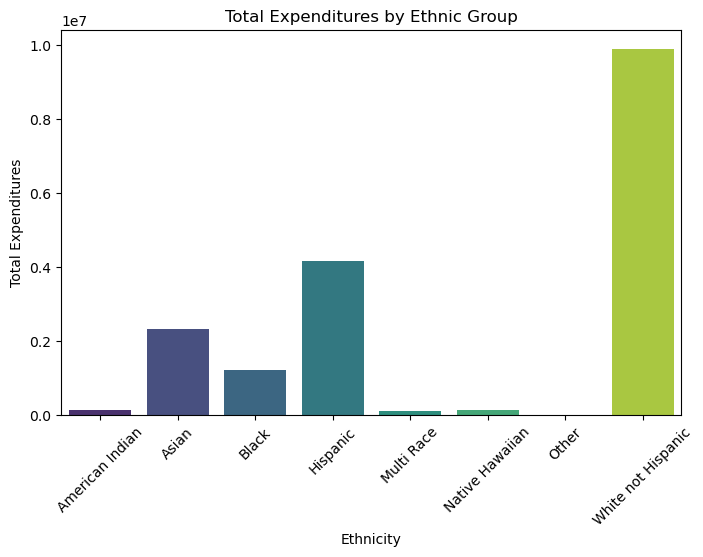

In [31]:
plt.figure(figsize=(8, 5))
ethnicity_expenditures = df.groupby("Ethnicity")["Expenditures"].sum().reset_index()

sns.barplot(data=ethnicity_expenditures, x="Ethnicity", y="Expenditures", hue="Ethnicity", palette="viridis", legend=False)

plt.title("Total Expenditures by Ethnic Group")
plt.xlabel("Ethnicity")
plt.ylabel("Total Expenditures")
plt.xticks(rotation=45)
plt.show()

#### Average Expenditure for Hispanic vs. White not Hispanic Consumers

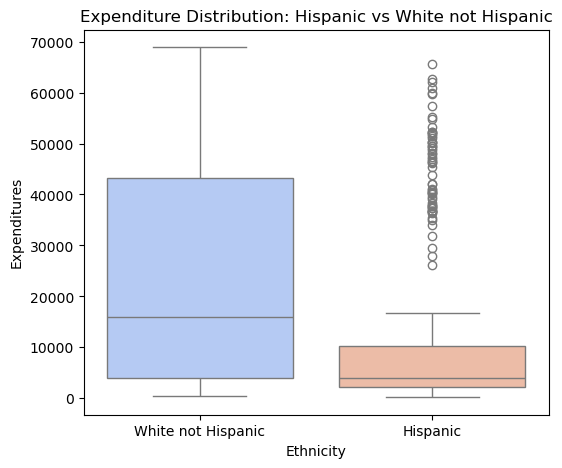

In [32]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df[df["Ethnicity"].isin(["Hispanic", "White not Hispanic"])], 
            x="Ethnicity", y="Expenditures", hue="Ethnicity", palette="coolwarm")

plt.title("Expenditure Distribution: Hispanic vs White not Hispanic")
plt.xlabel("Ethnicity")
plt.ylabel("Expenditures")
plt.show()

#### Expenditures by Age Cohort and Ethnicity

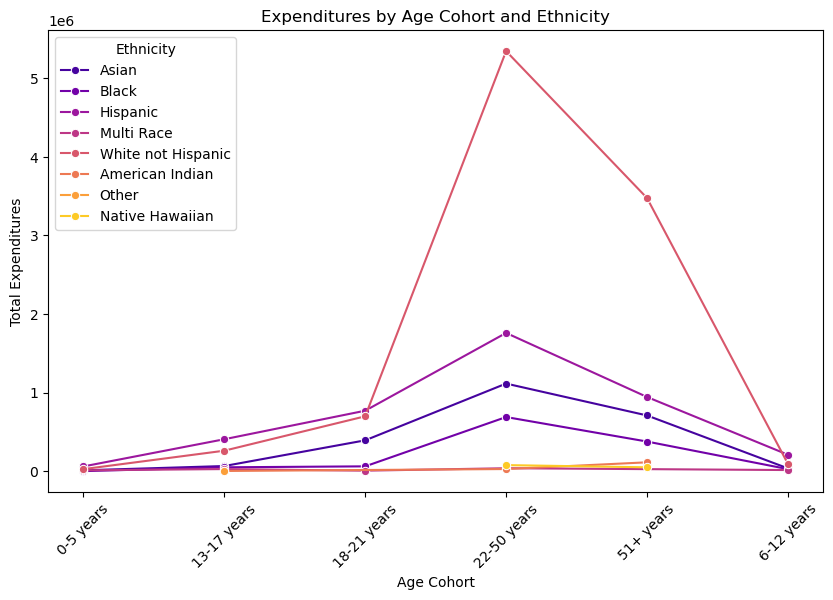

In [33]:
expenditure_by_age_ethnicity = df.groupby(["Age Cohort", "Ethnicity"])["Expenditures"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=expenditure_by_age_ethnicity, x="Age Cohort", y="Expenditures", hue="Ethnicity", marker="o", palette="plasma")

plt.title("Expenditures by Age Cohort and Ethnicity")
plt.xlabel("Age Cohort")
plt.ylabel("Total Expenditures")
plt.xticks(rotation=45)
plt.legend(title="Ethnicity")
plt.show()